# NLTK Spanish Food Delivery Orders

## The problem

For this exercise, you are going to imagine that you are working for a food delivery company, present throughout the national territory, with thousands of orders every day.

This company has a historical file with all the food requests that customers have made through the chat on its website in recent months.

They need to analyze in real time what meals users are ordering and what ingredients they had, since in the food stock chain it is necessary to make a forecast so as not to run out of cooked dishes.

It has been calculated that the impact on sales each time one of the dishes is no longer available is 7% of losses in that week, due to <u> abandonment of the web </u> of orders by the customer.

Therefore, it is vitally important to be able to <u> automatically make estimates in this regard. </u>

### Required behavior

The objective is to program a function that receives as input a user text and returns the chunks of text that refer to the meals and quantities that you have requested.

<u> It is not necessary </u>, nor is it the objective of this exercise, to <u> build an intention classifier </u> prior to this function, but simply a function that we assume receives a phrase with the intention 'Order_food '.

<u> Nor is it the objective to normalize the output </u> (ex: it is not necessary to convert 'three' to '3' or 'pizzas' to 'pizza').

It is, therefore, a minimum exercise

For Example: “quiero 3 bocadillos de anchoas y 2 pizzas” →

    [{comida:'bocadillo', ingrediente:'anchoas', cantidad:3},
     {comida:'pizza', ingrediente:'null', cantidad:2}]


Therefore, <u> the output of the function will be an array with dictionaries of 2 elements (food and quantity). </u> When a quantity is not detected, its value will be set to '1' as the default value.

The student <u> must use a NaiveBayesClassifier </u>, to locate the elements described above (food and quantity)

#### In order to get the maximum scoring (10/10):

Practice should begin with the most basic level of difficulty (RegexParser) and, if successful, add the following levels in succession.

In this way, <u> the deliverable will contain each and every one of the three ways to solve the problem (1-Regex Parser, 2-Unigram or Bigram tagger, 3-NaiveBayesClassifier) ​​</u>. Therefore, it is not enough to include, for example, only a NaiveBayesClassifier: you must also include the other two forms if you want to obtain the maximum score.

*Notes:

* This is simply a practice and therefore <u> a high precision system ready to use in production is not expected as a result, but simply a basic approach that allows to execute all three ways to solve the problem. >


* This exercise must be done with training texts in Spanish, but <u> taking into account that the precision of the NLTK POS taggers in Spanish is very bad </u>. Therefore, the student should not get frustrated by not obtaining good results, as we have said before it is simply a theoretical exercise and we can assume that, with a better analyzer, we could obtain better results.

#### Simple sketch of the program

To carry out the exercise, an NLP chain must be built with NLTK, with the following elements:
    
* sentence segmentation
* tokenization
* POS tagger (myphological analyzer for Spanish)

The obtained POS tags will then be used by the RegexParser, the UnigramParser, the BigramParser and the NaiveBayesClassifier.

## PseudoCode

1. A corpus of example sentences is created:

2. Afterwards, a tagger must be trained for Spanish (it is necessary to consult NLTK practice 2 in which we used the cess esp to obtain the tags of a corpus in Spanish).

3. Now, a Regex Parser that detects food and quantities must be built. A tutorial on Regex Parser can be found at the following link: nltk.org http://www.nltk.org/howto/chunk.html/

4. The POS tagger and the Regex Parser are used to obtain the IOBs of a new sentence.


*Note:

IOB encoding: uses two types of labels for each class, those that indicate the beginning of the entity's name (these begin with "B-") and those that indicate that the same name continues (these begin with "I-").

IOB: Inside, Outside, Beginning

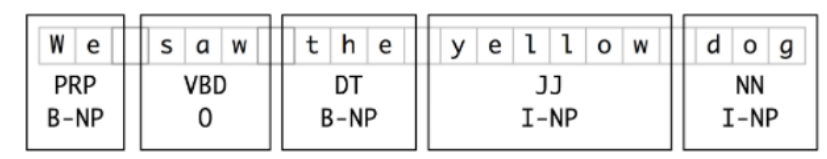

With these steps, we would already have the basic version of the practice covered.

### Extra to get 10/10 points:

5. However, finally, the student is suggested to use the POS tagger and the Regex Parser to create an IOB corpus that can be used to train bigram taggers or the NaiveBayesClassifier:

The codes of the Unigram, Bigram and NaiveBayes algorithms can be found in chapter 7 of the NLTK book: Steven Bird, Ewan Klein and Edward Loper. "7. Extracting Information from Text ”. Natural Language Processing with Python. [Online] URL available at: http://www.nltk.org/book/ch07.html

### Important:

<u> For the RegexTagger there is no need to create a corpus</u>, since it does not require training, <u> but only to define a suitable regular expression</u>.

But <u> for the unigram or bigram tagger, or for the NaiveBayesClassifier</u>, the first thing to do is <u> build a training corpus in IOB format</u>, in a text file that contains all training phrases.

This would be an <u> example</u> of a fragment of the training file for unigram or bigram tagger:

    yo PRP O
    quería VBD O
    una DT I-Cantidad
    hamburguesa NN I-Comida
    
In this case, you would only be training with the word POS tag (PRP, VBD ...) as an attribute (feature) for training.

With NaiveBayesClassifier, theoretically we will obtain better results and we can incorporate additional training information. The student must check if this is true, measuring the precision of each of the methods.

## Code

### Required libraries importing

In [1]:
import nltk
import pandas as pd
import numpy as np

In [2]:
# nltk.download()

### 1. Corpus creation

In [3]:
orderCorpus = '''
Me pones un pincho de tortilla, ¿por favor?
Quiero una pizza margarita.
Quisiera una hamburguesa.
¿Me pone una pizza carbonara?
Quiero dos raciones de croquetas, por favor.
¿Me pone una cocacola?
Dos tortillas.
Dame dos pizzas barbacoa para llevar, por favor.
¿Cuánto es todo?
Queremos dos cafés, un croissant y una tostada.
Un bocadillo de chorizo y unas patatas bravas.
Quiero un bocadillo de atún con pimientos para llevar.
¿Me cobras, por favor?
Ponme un sandwich de jamón y queso.
Queremos una ración de pulpo para compartir.
Un vaso de vino y unos calamares a la romana.
Dos zumos de naranja y dos pulgas de jamón, por favor.
Queremos tomar dos hamburguesas completas y dos cocacolas.
Nos gustaría comer dos bocadillos de tortilla, un café y un agua con gas.
Querría una botella de agua y una ración de empanada.
¿Podrías decirme dónde está el baño?
Camarero! Una de mero!

'''

Tokenizing our "corpus":

As most probably our corpus it's going to be a plain text, we have to:
1. Tokenize it into sentences with .sent_tokenize
2. Tokenize those sentences into words with word_tokenize

·Note: in order to tokenize words, we will use **toktok Tokenizer**, because <u>it handles better initial question marks in Spanish</u>.

In [4]:
toktok_tokenizerTOK = nltk.tokenize.toktok.ToktokTokenizer()

In [5]:
tokens = nltk.tokenize.sent_tokenize(orderCorpus, language='spanish') #splits the text in sentences. Pay attention with sentences that are not ending in any punctuation sign.
# tokens = [nltk.tokenize.word_tokenize(sentence, language='spanish') for sentence in tokens]

tokens = [toktok_tokenizerTOK.tokenize(sentence) for sentence in tokens]

In [6]:
print(tokens)

[['Me', 'pones', 'un', 'pincho', 'de', 'tortilla', ',', '¿', 'por', 'favor', '?'], ['Quiero', 'una', 'pizza', 'margarita', '.'], ['Quisiera', 'una', 'hamburguesa', '.'], ['¿', 'Me', 'pone', 'una', 'pizza', 'carbonara', '?'], ['Quiero', 'dos', 'raciones', 'de', 'croquetas', ',', 'por', 'favor', '.'], ['¿', 'Me', 'pone', 'una', 'cocacola', '?'], ['Dos', 'tortillas', '.'], ['Dame', 'dos', 'pizzas', 'barbacoa', 'para', 'llevar', ',', 'por', 'favor', '.'], ['¿', 'Cuánto', 'es', 'todo', '?'], ['Queremos', 'dos', 'cafés', ',', 'un', 'croissant', 'y', 'una', 'tostada', '.'], ['Un', 'bocadillo', 'de', 'chorizo', 'y', 'unas', 'patatas', 'bravas', '.'], ['Quiero', 'un', 'bocadillo', 'de', 'atún', 'con', 'pimientos', 'para', 'llevar', '.'], ['¿', 'Me', 'cobras', ',', 'por', 'favor', '?'], ['Ponme', 'un', 'sandwich', 'de', 'jamón', 'y', 'queso', '.'], ['Queremos', 'una', 'ración', 'de', 'pulpo', 'para', 'compartir', '.'], ['Un', 'vaso', 'de', 'vino', 'y', 'unos', 'calamares', 'a', 'la', 'romana', '

Now we continue with Morphological Analysis:

### 2. Tagger training

Now, we are going to train a tagger, in order to add tags to our tokens. We will need these tagged tokens in order to distinguish food and quantities , using RegexpParser.

Importing Spanish cess:

In [7]:
from nltk.corpus import cess_esp

If we want to know more about this tagger, check these urls:
* https://notebook.community/vitojph/kschool-nlp/notebooks-py3/pos-tagger-es
* https://freeling-user-manual.readthedocs.io/en/latest/tagsets/tagset-es/
* http://clic.ub.edu/corpus/webfm_send/13
* http://clic.ub.edu/corpus/webfm_send/61

From cess_esp, we **extract its tagged sentences** into a new object called "cess_tagged_sents":

In [8]:
cess_tagged_sents = cess_esp.tagged_sents() # Create a list of sentences from the corpus.
#sents

Later, we will need to divide our tagged sentences into two sets, **train** and **test**:

Defining a **new function to split our corpus**. It allows us to select either indexing splitting or sklearn train_test_split:

In [9]:
def corpusSplit(corpus, treshold=0.8, sklearn=False, random_state=None):
    """
    Splits a corpus in Train and Split sets

    corpus: List of sentences

    treshold: 0 to 1 - Percentaje we want to split

    sklearn: (bool) True if we want to use sklearn.model_selection.train_test_split 

    random_state: (int) Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls

    """
    if sklearn:
        from sklearn.model_selection import train_test_split
        X_train, X_test = train_test_split(corpus, test_size=treshold, random_state=random_state)
    else:
        corpus_Lenght = len(corpus)
        treshold=int(abs(corpus_Lenght*(1-treshold))) 
        X_train=corpus[:treshold]
        X_test=corpus[treshold:]

    return X_train, X_test

In order to use RegexParser to find our foods and quantities, **we have to tag our tokens**.

Let's **create and train** a HMM tagger:

In [10]:
from nltk.tag.hmm import HiddenMarkovModelTagger

In [11]:
hmm_tagger = HiddenMarkovModelTagger.train(cess_tagged_sents)

Once created, we can use it to tag our tokens:

In [12]:
tagged_corpus = [hmm_tagger.tag(sent) for sent in tokens]

In [13]:
print(tagged_corpus[0:])

[[('Me', 'pp1cs000'), ('pones', 'vmip3s0'), ('un', 'di0ms0'), ('pincho', 'ncms000'), ('de', 'sps00'), ('tortilla', 'ncfs000'), (',', 'Fc'), ('¿', 'Fia'), ('por', 'sps00'), ('favor', 'ncms000'), ('?', 'Fit')], [('Quiero', 'sps00'), ('una', 'di0fs0'), ('pizza', 'ncfs000'), ('margarita', 'aq0fs0'), ('.', 'Fp')], [('Quisiera', 'sps00'), ('una', 'di0fs0'), ('hamburguesa', 'ncfs000'), ('.', 'Fp')], [('¿', 'Fia'), ('Me', 'pp1cs000'), ('pone', 'vmip3s0'), ('una', 'di0fs0'), ('pizza', 'ncfs000'), ('carbonara', 'aq0fs0'), ('?', 'Fit')], [('Quiero', 'da0mp0'), ('dos', 'dn0cp0'), ('raciones', 'ncfp000'), ('de', 'sps00'), ('croquetas', 'np0000l'), (',', 'Fc'), ('por', 'sps00'), ('favor', 'ncms000'), ('.', 'Fp')], [('¿', 'Fia'), ('Me', 'pp1cs000'), ('pone', 'vmip3s0'), ('una', 'di0fs0'), ('cocacola', 'ncfs000'), ('?', 'Fit')], [('Dos', 'dn0cp0'), ('tortillas', 'ncfp000'), ('.', 'Fp')], [('Dame', 'da0mp0'), ('dos', 'dn0cp0'), ('pizzas', 'ncmp000'), ('barbacoa', 'aq0mpp'), ('para', 'sps00'), ('llevar'

*Note: In case we would like to create a string-format corpus, we could use .tag.tuple2str:

In [14]:
testString = nltk.tag.tuple2str(tagged_corpus[1][0])

In [15]:
testString

'Quiero/sps00'

In order to make things easier later, we will create a simple function to get the tagged tokens from a string:

In [16]:
def sentenceTagger (sentence):
    
    tokens = nltk.tokenize.word_tokenize(sentence, language='spanish')
    taggedSentence = hmm_tagger.tag(tokens)
    
    
    return taggedSentence

### 3. Regex Parser Construction

check the following url:
* http://www.nltk.org/howto/chunk.html

*some info about grammar
* https://huntertran.com/2020/10/09/Grammar-Regex-Pattern-for-NLTK-Part-of-Speech-Tagging/

We can call nltk.chunk.regexp.demo() in order to get some examples:

First of all, we need to create a grammar for the parser:

In [17]:
grammar = r""" 
  
  ingredient: {<di.*|dn.*>+ <NoTag>* ((<n.*>+ (<s.*>+ <n.*>+ |<a.*>*) )+  <a.*>*)+}
  }<di.*|dn.*>+ <NoTag>* (<n.*>)+{
  
  food:{<di.*|dn.*>+ <NoTag>* ((<n.*>+ <s.*>+ <n.*>+ | <nc.*>+)+  <a.*>*)+} 
  }<di.*|dn.*>{
  
  quantity: {<di.*|dn.*>}
  
  order: {<quantity>* <food>* <ingredient>*}
"""

# Explaination: 

# (ingredient)first of all, we are chunking all containing what we decided 
# to be <quantity><food><ingredient> from that we chink <quantity><food>

# (food)after doing that, we are chunking all semi-sentences starting by one or  
# more <di.*> or <dn.*> tagged words, and then chinking those starting words.

# (quantity)then, we are chunking those <di.*> or <dn.*> tagged words as quantities

# (order)finally, we are nesting those chunks in a new "order" chunk.

Once we have created our grammar, we use **RegexpParser** to generate **new trees** based on it:

In [18]:
regex_parser = nltk.RegexpParser(grammar)

regex_tagged_corpus = [regex_parser.parse(tagged_sentence) for tagged_sentence in tagged_corpus]

print(regex_tagged_corpus[5])

# regex_tagged_corpus[5].draw() #it opens a NLTK window with a graphical representation of the scheme

(S
  ¿/Fia
  Me/pp1cs000
  pone/vmip3s0
  (order (quantity una/di0fs0) (food cocacola/ncfs000))
  ?/Fit)


We can **extract food, quantities and ingredients** from our corpus:

In [19]:
for tree in regex_tagged_corpus:
    for subtree in tree.subtrees():
        if subtree.label() == 'quantity':
            print ('quantity:', ' '.join(nltk.untag(subtree))) # .join(untag) gets all tagged words and create a string
        elif subtree.label() == 'food':
            print ('food:', ' '.join(nltk.untag(subtree)))
        elif subtree.label() == 'ingredient':
            print ('ingredient:', ' '.join(nltk.untag(subtree)))            
            print ('---------------')

quantity: un
food: pincho
ingredient: de tortilla
---------------
quantity: una
food: pizza
ingredient: margarita
---------------
quantity: una
food: hamburguesa
quantity: una
food: pizza
ingredient: carbonara
---------------
quantity: dos
food: raciones
ingredient: de croquetas
---------------
quantity: una
food: cocacola
quantity: Dos
food: tortillas
quantity: dos
food: pizzas
ingredient: barbacoa
---------------
quantity: dos
food: cafés
quantity: un
food: croissant
quantity: una
food: tostada
quantity: Un
food: bocadillo
ingredient: de chorizo
---------------
quantity: unas
food: patatas
ingredient: bravas
---------------
quantity: un
food: bocadillo
quantity: un
food: sandwich
ingredient: de jamón
---------------
quantity: una
food: ración
quantity: Un
food: vaso
ingredient: de vino
---------------
quantity: unos
food: calamares
quantity: Dos
food: zumos
ingredient: de naranja
---------------
quantity: dos
food: pulgas
ingredient: de jamón
---------------
quantity: dos
food: hambu

#### Storing food, quantity and ingredient data into a list of dicts:

We could create the dataFrame using **nested for loops**:

But let´s do the same with **list comprehension**:

In [20]:
dataBase = pd.DataFrame([{item.label():' '.join(nltk.untag(item)) for item in subtree} 
                         for tree in regex_tagged_corpus 
                         for subtree in tree.subtrees(lambda s: (s.label()=='order'))])

# this list comprehension behaves exactly in the same way as the nested for loops above

In [21]:
dataBase.head()

,quantity,food,ingredient
0,un,pincho,de tortilla
1,una,pizza,margarita
2,una,hamburguesa,NaN
3,una,pizza,carbonara
4,dos,raciones,de croquetas


Cleaning our dataFrame:

In [22]:
dataBase = dataBase.dropna(how='all') #deletes rows with all missing values
dataBase['quantity'] = dataBase['quantity'].fillna(value = 1) # if quantity is missing, default=1

In [23]:
dataBase.head()

,quantity,food,ingredient
0,un,pincho,de tortilla
1,una,pizza,margarita
2,una,hamburguesa,NaN
3,una,pizza,carbonara
4,dos,raciones,de croquetas


Now we can analyze new sentence and extract the food and quantity:

In [24]:
testSent_1 = 'quisiera dos tortillas de berenjenas y una sopa'

In [25]:
testSent1_parsed = regex_parser.parse(sentenceTagger(testSent_1))

In [26]:
print(testSent1_parsed)

(S
  quisiera/da0mp0
  (order
    (quantity dos/dn0cp0)
    (food tortillas/ncfp000)
    (ingredient de/sps00 berenjenas/np0000l))
  y/cc
  (order (quantity una/di0fs0) (food sopa/ncfs000)))


In [27]:
for s in testSent1_parsed.subtrees(lambda s: (s.label()=='order')):
    print(s)

(order
  (quantity dos/dn0cp0)
  (food tortillas/ncfp000)
  (ingredient de/sps00 berenjenas/np0000l))
(order (quantity una/di0fs0) (food sopa/ncfs000))


In [28]:
testSent_data = [{item.label():' '.join(nltk.untag(item)) for item in s}
  for s in testSent1_parsed.subtrees(lambda s: (s.label()=='order'))]
testSent_data

[{'quantity': 'dos', 'food': 'tortillas', 'ingredient': 'de berenjenas'},
 {'quantity': 'una', 'food': 'sopa'}]

An we can add our data to our dataBase DataFrame:

In [29]:
dataBase.tail()

,quantity,food,ingredient
22,dos,bocadillos,de tortilla
23,un,café,NaN
24,un,agua,con gas
25,una,botella,de agua
26,una,ración,de empanada


In [30]:
dataBase = dataBase.append(testSent_data, ignore_index=True)

In [31]:
dataBase.tail()

,quantity,food,ingredient
24,un,agua,con gas
25,una,botella,de agua
26,una,ración,de empanada
27,dos,tortillas,de berenjenas
28,una,sopa,NaN


#### Converting our tags to IOB:

### 4. Getting IOB tags

In first place, we need to have a tagged corpus, with its IOB tags.
With this corpus, we will train some taggers afterwards.

#### Creating a tagged corpus

We need something like this:

    yo PRP O
    quería VBD O
    una DT I-Cantidad
    hamburguesa NN I-Comida

Now that we have a tree for each sentence thanks to RegexpParser, we can use nltk's function for in order to add IOB tags: 
- .tree2conlltags:

Note: **IOB tagging does not permit any nesting**, in order to make this work for a whole sencence, we should have not created "order" chunk so we are going add IOB tags only to trees with a "height" lower than 3.

* From Documentation: 
            height(self):
            The height of this tree.  The height of a tree
            containing no children is 1; the height of a tree
            containing only leaves is 2; and the height of any other
            tree is one plus the maximum of its children's
            heights. 

In [32]:
iob_corpus = [nltk.tree2conlltags(rsubtree) 
              for rtree in regex_tagged_corpus 
              for rsubtree in rtree.subtrees(lambda s: (s.height()<=3))]
iob_corpus[0]

[('un', 'di0ms0', 'B-quantity'),
 ('pincho', 'ncms000', 'B-food'),
 ('de', 'sps00', 'B-ingredient'),
 ('tortilla', 'ncfs000', 'I-ingredient')]

Anyway, we will use a not-nested IOB corpus afterwards, because we need to use **tree2conlltags** function in order to create alternative classifiers.

We have to re-build our IOB tagged corpus, and get rid of the 'order' chunk, so we can create it now:

First of all, we need to create a **grammar** for the new parser:

*Note: "grammar_2" is equal to "grammar", but without the "order" chunk rule.

In [33]:
grammar_2 = r""" 
  
  ingredient: {<di.*|dn.*>+ <NoTag>* ((<n.*>+ (<s.*>+ <n.*>+ |<a.*>*) )+  <a.*>*)+}
  }<di.*|dn.*>+ <NoTag>* (<n.*>)+{
  
  food:{<di.*|dn.*>+ <NoTag>* ((<n.*>+ <s.*>+ <n.*>+ | <nc.*>+)+  <a.*>*)+} 
  }<di.*|dn.*>{
  
  quantity: {<di.*|dn.*>}
  
"""

# Explaination: 

# (ingredient)first of all, we are chunking all containing what we decided 
# to be <quantity><food><ingredient> from that we chink <quantity><food>

# (food)after doing that, we are chunking all semi-sentences starting by one or  
# more <di.*> or <dn.*> tagged words, and then chinking those starting words.

# (quantity)then, we are chunking those <di.*> or <dn.*> tagged words as quantities

Once we have created our grammar, we use RegexpParser to generate new trees based on it:

In [34]:
regex_parser_2 = nltk.RegexpParser(grammar_2)

regex_tagged_corpus_2 = [regex_parser_2.parse(tagged_sentence) for tagged_sentence in tagged_corpus]

print(regex_tagged_corpus_2[5])

# regex_tagged_corpus[5].draw() #it opens a NLTK window with a graphical representation of the scheme

(S
  ¿/Fia
  Me/pp1cs000
  pone/vmip3s0
  (quantity una/di0fs0)
  (food cocacola/ncfs000)
  ?/Fit)


In [35]:
iob_corpus_2 = [nltk.tree2conlltags(subtree) 
              for subtree in regex_tagged_corpus_2]
iob_corpus_2[0]

[('Me', 'pp1cs000', 'O'),
 ('pones', 'vmip3s0', 'O'),
 ('un', 'di0ms0', 'B-quantity'),
 ('pincho', 'ncms000', 'B-food'),
 ('de', 'sps00', 'B-ingredient'),
 ('tortilla', 'ncfs000', 'I-ingredient'),
 (',', 'Fc', 'O'),
 ('¿', 'Fia', 'O'),
 ('por', 'sps00', 'O'),
 ('favor', 'ncms000', 'O'),
 ('?', 'Fit', 'O')]

Note that we don´t have any nesting now, and our IOB corpus is complete.

#### Storing our IOB Corpus 

We should **save our IOB corpus as a .txt file**, we can use nltk.tree2conllstr(). It takes a tree as an input, and outputs a string file.

In [36]:
with open("IOB_corpus.txt", 'w') as f:
    f.writelines([nltk.tree2conllstr(subtree) 
              for subtree in regex_tagged_corpus_2])
f.close()

### 5. Alternative Classifiers (EXTRA)

First of all, we are going to create some taggers, and train them over our food tagged corpus. This makes not a lot of sense since our corpus is created by a CESS trained tagger, and we could simply train our new taggers over CESS but, anyway, if in real life we had a real food tagged corpus, we could use them in the following way:

In order to be able to test our taggers, we should **split our corpus in train and test sets**:

In [37]:
tagged_corpus[:2]

[[('Me', 'pp1cs000'),
  ('pones', 'vmip3s0'),
  ('un', 'di0ms0'),
  ('pincho', 'ncms000'),
  ('de', 'sps00'),
  ('tortilla', 'ncfs000'),
  (',', 'Fc'),
  ('¿', 'Fia'),
  ('por', 'sps00'),
  ('favor', 'ncms000'),
  ('?', 'Fit')],
 [('Quiero', 'sps00'),
  ('una', 'di0fs0'),
  ('pizza', 'ncfs000'),
  ('margarita', 'aq0fs0'),
  ('.', 'Fp')]]

In [38]:
corpus_Test, corpus_Train = corpusSplit(tagged_corpus)
corpus_Train[:2]

[[('Quiero', 'da0mp0'),
  ('dos', 'dn0cp0'),
  ('raciones', 'ncfp000'),
  ('de', 'sps00'),
  ('croquetas', 'np0000l'),
  (',', 'Fc'),
  ('por', 'sps00'),
  ('favor', 'ncms000'),
  ('.', 'Fp')],
 [('¿', 'Fia'),
  ('Me', 'pp1cs000'),
  ('pone', 'vmip3s0'),
  ('una', 'di0fs0'),
  ('cocacola', 'ncfs000'),
  ('?', 'Fit')]]

Import and definition of our new Taggers:

In [39]:
from nltk import UnigramTagger, BigramTagger, TrigramTagger, DefaultTagger
from nltk.tag.hmm import HiddenMarkovModelTagger

default_tagger = DefaultTagger("NoTag")
unigram_tagger = UnigramTagger(corpus_Train, backoff=default_tagger)
bigram_tagger = BigramTagger(corpus_Train, backoff=unigram_tagger) #backoff: if it is not able to tag a word, it will use unigram
trigram_tagger = TrigramTagger(corpus_Train, backoff=bigram_tagger)
hmm_tagger = HiddenMarkovModelTagger.train(corpus_Train) #too slow with CESS

In [40]:
testSent_2 = 'Quisiera una tortilla, dos raciones de patatas y un pollo mediano'

And we can now test our taggers:

In [41]:
testSent_2_tokens = nltk.word_tokenize(testSent_2) #tokens from the sentence that we want to tag

In [42]:
def taggerTester (taggerList, tokens):
    """
    Creates a DataFrame containing all tags obtained with our taggers
    *Pandas library is needed. Import it as pd
    
    taggerList: python list containing our (previously defined)taggers.
    
    tokens: list of tokens obtained from the sentence we want to compare the tags of.
    
    
    """
    dfList = [[tuple[1] for tuple in tagger.tag(tokens)] for tagger in taggerList ]
    df = pd.DataFrame(dfList,index= taggerList,columns=tokens)
    return df

In [43]:
def taggerScoring (taggerList, test_set):
    """
    prints out the scores of the taggers contained in taggerList
    
    taggerList: python list containing our (previously defined)taggers.
    
    test_set: test set from our corpus
    """
    for tagger in taggerList:
        print (str(tagger), round(tagger.evaluate(test_set)*100,2), "%")
        

In [44]:
taggerList=[unigram_tagger, bigram_tagger, trigram_tagger, hmm_tagger] #list of taggers that we will use

Lets check the **tags** that our taggers assigned to our sentence:

In [45]:
taggerTester(taggerList, testSent_2_tokens)

,Quisiera,una,tortilla,",",dos,raciones,de,patatas,y,un,pollo,mediano
<UnigramTagger: size=83>,NoTag,di0fs0,ncfs000,Fc,dn0cp0,ncfp000,sps00,ncfp000,cc,di0ms0,NoTag,NoTag
<BigramTagger: size=4>,NoTag,di0fs0,ncfs000,Fc,dn0cp0,ncfp000,sps00,ncfp000,cc,di0ms0,NoTag,NoTag
<TrigramTagger: size=3>,NoTag,di0fs0,ncfs000,Fc,dn0cp0,ncfp000,sps00,ncfp000,cc,di0ms0,NoTag,NoTag
<HiddenMarkovModelTagger 36 states and 86 output symbols>,sps00,di0fs0,ncfs000,Fc,dn0cp0,ncfp000,sps00,ncms000,cc,di0ms0,ncms000,cc


And we can **evaluate** our taggers, cheking the scoring:

In [46]:
taggerScoring(taggerList, corpus_Test)

<UnigramTagger: size=83> 66.67 %
<BigramTagger: size=4> 66.67 %
<TrigramTagger: size=3> 66.67 %
<HiddenMarkovModelTagger 36 states and 86 output symbols> 70.37 %


*Note: Depending on the sentence, and our training corpus, we should have different scoring values, sometimes Trigram is not the best one.

### Alternative chunkers

We should **split** our regex tagged corpus, into **train** and **test** sets:

In [47]:
regex_train, regex_test = corpusSplit(regex_tagged_corpus_2)

#### Unigram chunker

Following chapter 7 from NLTK book, in order to create an Unigram Chunker, we need a previously chunked corpus, in Tree format. Let's use the one that we created before (using the RegExp Parser):

NLTK Book Unigram definition:

In [48]:
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)] # w, t, c: word, tag, chunk
                      for sent in train_sents] #it takes our trees, converts them to a list of tuples(triples) and and extracts POS and Chunk tags
        self.tagger = nltk.UnigramTagger(train_data) # stores the trained UnigramTagger, for later use.

    def parse(self, sentence): # re-tags the sentence using the previously trined tagger (self.tagger)
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

Now we can create our new Unigram object:

In [49]:
unigram_Chunker = UnigramChunker(regex_train)

Testing its performance:

In [50]:
print(unigram_Chunker.evaluate(regex_test))

ChunkParse score:
    IOB Accuracy:  67.9%%
    Precision:     64.9%%
    Recall:        40.7%%
    F-Measure:     50.0%%


Applying it to a new sentence:

In [51]:
testSent_2

'Quisiera una tortilla, dos raciones de patatas y un pollo mediano'

In [52]:
print(unigram_Chunker.parse(sentenceTagger(testSent_2)))

(S
  Quisiera/sps00
  (quantity una/di0fs0)
  (food tortilla/ncfs000)
  ,/Fc
  dos/dn0cp0
  raciones/ncfp000
  de/sps00
  (food patatas/ncms000)
  y/cc
  (quantity un/di0ms0)
  (food pollo/ncms000)
  mediano/cc)


#### Bigram chunker

In [53]:
class BigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)] # w, t, c: word, tag, chunk
                      for sent in train_sents] #it takes our trees, converts them to a list of tuples(triples) and and extracts POS and Chunk tags
        self.tagger = nltk.BigramTagger(train_data) # stores the trained UnigramTagger, for later use.

    def parse(self, sentence): # re-tags the sentence using the previously trined tagger (self.tagger)
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

Now we can create our new Bigram object:

In [54]:
bigram_Chunker = BigramChunker(regex_train)

Testing its performance:

In [55]:
print(bigram_Chunker.evaluate(regex_test))

ChunkParse score:
    IOB Accuracy:  63.5%%
    Precision:     78.6%%
    Recall:        18.6%%
    F-Measure:     30.1%%


A little bit worse Accuracy comparing to Unigram.

Applying it to a new sentence:

In [56]:
print(bigram_Chunker.parse(sentenceTagger(testSent_2)))

(S
  Quisiera/sps00
  (quantity una/di0fs0)
  (food tortilla/ncfs000)
  ,/Fc
  dos/dn0cp0
  raciones/ncfp000
  de/sps00
  patatas/ncms000
  y/cc
  un/di0ms0
  pollo/ncms000
  mediano/cc)


#### Naive Bayes Classifier-Based Chunker

**When POS tags are insufficient** to determine how a sentence should be chunked, we need to use **information** about the **content** of the words in addition to POS tags.

In [57]:
class ConsecutiveNPChunkTagger(nltk.TaggerI):
    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = npchunk_features(untagged_sent, i, history) 
                train_set.append( (featureset, tag) )
                history.append(tag)
        
        self.classifier = nltk.NaiveBayesClassifier.train(train_set)

    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = npchunk_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
        return zip(sentence, history)
    


class ConsecutiveNPChunker(nltk.ChunkParserI): 
    def __init__(self, train_sents):
        tagged_sents = [[((w,t),c) for (w,t,c) in
                         nltk.chunk.tree2conlltags(sent)]
                        for sent in train_sents]
        self.tagger = ConsecutiveNPChunkTagger(tagged_sents)

    def parse(self, sentence):
        tagged_sents = self.tagger.tag(sentence)
        conlltags = [(w,t,c) for ((w,t),c) in tagged_sents]
        return nltk.chunk.conlltags2tree(conlltags)

In [58]:
def npchunk_features(sentence, i, history):
    word, pos = sentence[i]
    return {"pos": pos}

In [59]:
naiveBayes_Chunker = ConsecutiveNPChunker(regex_train)

In [60]:
print(naiveBayes_Chunker.evaluate(regex_test))

ChunkParse score:
    IOB Accuracy:  67.3%%
    Precision:     81.8%%
    Recall:        30.5%%
    F-Measure:     44.4%%


Accuracy is a bit better than in the previous Unigram and Bigram

Applying it to a new sentence:

In [61]:
print(naiveBayes_Chunker.parse(sentenceTagger(testSent_2)))

(S
  Quisiera/sps00
  (quantity una/di0fs0)
  (food tortilla/ncfs000)
  ,/Fc
  dos/dn0cp0
  raciones/ncfp000
  de/sps00
  patatas/ncms000
  y/cc
  (quantity un/di0ms0)
  pollo/ncms000
  mediano/cc)
